In [1]:
import os
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
import tqdm
### notebook specific configuration ###
from os.path import basename
mpl.style.use('fivethirtyeight')

In [2]:
ref_fa = '/data/genome/hamster/picr/picr.fa'
annotation = '/data/genome/hamster/picr/updated_final_sort.gff3'

In [3]:
mrna_peak = '/data/isshamie/TSS_CHO/mRNA.peak'
genome_ann_mrna = pd.read_csv(mrna_peak,sep='\t',index_col=0)

genome_ann_mrna.head()



,Chr,Start,End,Strand
ID,,,,
ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;gene=gene_1;transcript_id=asmbl_1;cs=5,picr_0,9,11,+
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,175,177,+
ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;gene=gene_1;transcript_id=asmbl_3;cs=5,picr_0,3879,3881,+
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7714,7716,-
ID=asmbl_6;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_6;cs=1,picr_0,7714,7716,-


In [5]:
genome_ann_exon = pd.read_csv('/data/isshamie/TSS_CHO/exon.peak',sep='\t',index_col=0)

genome_ann_exon.head()

,Chr,Start,End,Strand
ID,,,,
ID=asmbl_117.exon1;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1599199,1599201,+
ID=asmbl_118.exon1;Parent=asmbl_118;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_118,picr_0,1599203,1599205,+
ID=asmbl_119.exon1;Parent=asmbl_119;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_119,picr_0,1599276,1599278,+
ID=asmbl_117.exon2;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1608734,1608736,+
ID=asmbl_114.exon2;Parent=asmbl_114;gene_id=gene_27_1;gene=ARHGAP8;transcript_id=asmbl_114,picr_0,1608734,1608736,+


In [16]:
unique_genes = set()
for ind,val in genome_ann_mrna.iterrows():
    tmp = re.findall('gene=(.*);transcript_id*',ind)[0]
    if tmp == []:
        print('No gene?',ind)
        break
    unique_genes.add(tmp)
print('Number of unique genes: ',len(unique_genes))

('Number of unique genes: ', 26128)


In [3]:
#### Number of unique gene_names
unique_genes = set()
for ind,val in genome_ann_mrna.iterrows():
    tmp = re.findall('gene=(.*);transcript_id*',ind)[0]
    if tmp == []:
        print('No gene?',ind)
        break
    unique_genes.add(tmp)
print('Number of unique genes: ',len(unique_genes))

unique_gene_id = set()
for ind,val in genome_ann_mrna.iterrows():
    tmp = re.findall('gene_id=(.*);gene*',ind)[0]
    
    unique_gene_id.add(tmp)

print('Number of unique gene_id for mrna', len(unique_gene_id))

#### Number of unique start sites for mrna

ss = set()
for ind, val in genome_ann_mrna.iterrows():
    ss.add(str(val['Start']) + '_' + val['Strand']+ '_' + val['Chr'])
print('Number of unique start sites for mrna', len(ss))

print('Number of transcripts per gene: ',1.0*len(genome_ann_mrna)/len(unique_genes))
print('Number of transcripts per gene_id: ',1.0*len(genome_ann_mrna)/len(unique_gene_id))

print('Number of transcripts',len(genome_ann_mrna))
print ('Number of exons',len(genome_ann_exon))

mrna_transcript = set()
for ind,val in genome_ann_mrna.iterrows():
    mrna_transcript.add(ind.split('transcript_id=')[1].split(';')[0])

print('Number of unique transcript for mrna', len(mrna_transcript))

#### Number of unique gene_id from exon

exon_gene_id = set()
for ind,val in genome_ann_exon.iterrows():
    #exon_gene_id.add(ind.split('gene_id=')[1].split(';')[0])
    exon_gene_id.add(re.findall('gene_id=(.*);gene*',ind)[0])
    
print('Number of unique gene_ids in exon annotations', len(exon_gene_id))

('Number of unique genes: ', 26128)
('Number of unique gene_id for mrna', 34338)
('Number of unique start sites for mrna', 62817)
('Number of transcripts per gene: ', 2.9795238824249846)
('Number of transcripts per gene_id: ', 2.267138447201351)
('Number of transcripts', 77849)
('Number of exons', 867950)
('Number of unique transcript for mrna', 77849)
('Number of unique gene_ids in exon annotations', 38508)


In [4]:
genome_ann_mrna = pd.read_csv(mrna_peak,sep='\t',index_col=0)

In [5]:
genome_ann_mrna.head()

,Chr,Start,End,Strand
ID,,,,
ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;gene=gene_1;transcript_id=asmbl_1;cs=5,picr_0,9,11,+
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,175,177,+
ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;gene=gene_1;transcript_id=asmbl_3;cs=5,picr_0,3879,3881,+
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7714,7716,-
ID=asmbl_6;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_6;cs=1,picr_0,7714,7716,-


In [6]:
genome_ann_exon = pd.read_csv('/data/isshamie/TSS_CHO/exon.peak',sep='\t',index_col=0)

In [7]:
genome_ann_exon.head()

,Chr,Start,End,Strand
ID,,,,
ID=asmbl_117.exon1;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1599199,1599201,+
ID=asmbl_118.exon1;Parent=asmbl_118;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_118,picr_0,1599203,1599205,+
ID=asmbl_119.exon1;Parent=asmbl_119;gene_id=gene_27_3;gene=ARHGAP8;transcript_id=asmbl_119,picr_0,1599276,1599278,+
ID=asmbl_117.exon2;Parent=asmbl_117;gene_id=gene_27_2;gene=gene_27;transcript_id=asmbl_117,picr_0,1608734,1608736,+
ID=asmbl_114.exon2;Parent=asmbl_114;gene_id=gene_27_1;gene=ARHGAP8;transcript_id=asmbl_114,picr_0,1608734,1608736,+


#### Number of unique gene_names

In [8]:
exon_not_mrna = exon_gene_id - exon_gene_id.intersection(unique_gene_id)

In [9]:
exon_not_mrna

{'gene_17841',
 'gene_15174',
 'gene_3048_2',
 'gene_20251_3',
 'gene_2003',
 'gene_9225',
 'gene_27830',
 'gene_1186_2',
 'gene_2008',
 'gene_23393',
 'gene_17843',
 'gene_23425',
 'gene_23424',
 'gene_27390',
 'gene_23428',
 'gene_10524',
 'gene_4962_2',
 'gene_18725_2',
 'gene_3844',
 'gene_10521',
 'gene_20608',
 'gene_18530',
 'gene_22010',
 'gene_23667_3',
 'gene_21734',
 'gene_29566',
 'gene_15776',
 'gene_19914',
 'gene_29567',
 'gene_1646_13',
 'gene_2718',
 'gene_1646_11',
 'gene_5444',
 'gene_5117',
 'gene_5446',
 'gene_5447',
 'gene_5448',
 'gene_25549',
 'gene_2713',
 'gene_2715',
 'gene_11400',
 'gene_2716',
 'gene_23645',
 'gene_23646',
 'gene_23642',
 'gene_2165',
 'gene_16260',
 'gene_10636',
 'gene_16460',
 'gene_16465',
 'gene_5593',
 'gene_21326',
 'gene_1010',
 'gene_28270_6',
 'gene_1015',
 'gene_1014',
 'gene_20514',
 'gene_20515',
 'gene_22465',
 'gene_17410_2',
 'gene_20513',
 'gene_13983',
 'gene_17832_9',
 'gene_26311_2',
 'gene_24703',
 'gene_11459',
 'gene_

In [10]:
genome_ann_exon[genome_ann_exon.index.str.contains('gene_id=gene_17841;gene*')]


,Chr,Start,End,Strand
ID,,,,
ID=asmbl_50412.exon1;Parent=asmbl_50412;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50412,picr_39,3125307,3125309,+
ID=asmbl_50411.exon1;Parent=asmbl_50411;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50411,picr_39,3125307,3125309,+
ID=asmbl_50413.exon1;Parent=asmbl_50413;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50413,picr_39,3125403,3125405,+
ID=asmbl_50412.exon2;Parent=asmbl_50412;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50412,picr_39,3130566,3130568,+
ID=asmbl_50413.exon2;Parent=asmbl_50413;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50413,picr_39,3130566,3130568,+
ID=asmbl_50413.exon3;Parent=asmbl_50413;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50413,picr_39,3131167,3131169,+
ID=asmbl_50412.exon3;Parent=asmbl_50412;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50412,picr_39,3131167,3131169,+
ID=asmbl_50411.exon2;Parent=asmbl_50411;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50411,picr_39,3131167,3131169,+
ID=asmbl_50412.exon4;Parent=asmbl_50412;gene_id=gene_17841;gene=gene_17841;transcript_id=asmbl_50412,picr_39,3135499,3135501,+


### For some reason there are more gene_ids just with exons than there are when looking at the mRNA in the gff. Are some not part  or a gene? It doesn't really make sense(38508 to 34338) 

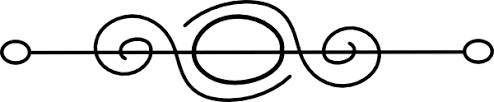

In [22]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png',width=600)

# Construct start site specific file
'ID','Chr','Start','End','Strand','CS','gene_id','gene','transcript_id' 
If two transcripts have the same start site, pick the one with lower cs (more confident), if the same cs, pick the longer TS

### Read in annotation

In [19]:
mRNA_anno_file = '/data/isshamie/genome/mRNA_updated_final_sort.gff3'
mRNA_anno = pd.read_csv(mRNA_anno_file,sep='\t',header=None,index_col=8)
#Munge data for downstream processing
cols = mRNA_anno.columns.values
cols = ['Chr','Merge','Type','Start','End','.','Strand','..']
mRNA_anno.columns= cols
#Drop the unncesseary columns
mRNA_anno.drop(['Merge','.','..','Type'],axis=1,inplace=True)

In [20]:
mRNA_anno.head()

,Chr,Start,End,Strand
8,,,,
ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;gene=gene_1;transcript_id=asmbl_1;cs=5,picr_0,10,41421,+
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+
ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;gene=gene_1;transcript_id=asmbl_3;cs=5,picr_0,3880,39299,+
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7715,44542,-


### Break the annotation id into its separate components and calculate distances

In [32]:
tmp_mRNA_anno= mRNA_anno.copy()
for ind in tmp_mRNA_anno.index.values:
    curr = ind.split(';')
    for i in curr:
        curr_split = i.split('=')
        tmp_mRNA_anno.set_value(ind,curr_split[0],curr_split[1])
tmp_mRNA_anno['cs'] = tmp_mRNA_anno['cs'].astype(int)
tmp_mRNA_anno['Length'] = tmp_mRNA_anno['End'] - tmp_mRNA_anno['Start']
tmp_mRNA_anno.head()

,Chr,Start,End,Strand,ID,Parent,gene_id,gene,transcript_id,cs,Length
8,,,,,,,,,,,
ID=asmbl_1;Parent=gene_1_1;gene_id=gene_1_1;gene=gene_1;transcript_id=asmbl_1;cs=5,picr_0,10,41421,+,asmbl_1,gene_1_1,gene_1_1,gene_1,asmbl_1,5,41411
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+,asmbl_2,gene_1_2,gene_1_2,SERHL,asmbl_2,2,38518
ID=asmbl_3;Parent=gene_1_3;gene_id=gene_1_3;gene=gene_1;transcript_id=asmbl_3;cs=5,picr_0,3880,39299,+,asmbl_3,gene_1_3,gene_1_3,gene_1,asmbl_3,5,35419
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-,asmbl_4,gene_2,gene_2,RRP7A,asmbl_4,1,38915
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7715,44542,-,asmbl_5,gene_2,gene_2,RRP7A,asmbl_5,2,36827


In [33]:
before_cs_filter = set(tmp_mRNA_anno['gene'].unique())
print(len(before_cs_filter))

26128


#### Filter to remove any cs=5 meaning no protein mapping

In [34]:
tmp_mRNA_anno = tmp_mRNA_anno[tmp_mRNA_anno['cs'] != 5]

In [35]:
after_cs_filter = set(tmp_mRNA_anno['gene'].unique())
print(len(after_cs_filter))

17333


### Most, not all dropped genes are gene_ convention 
(which makes sense since if it got a gene name it matched well

In [42]:
dropped = (before_cs_filter - after_cs_filter)
print('Number of genes dropped b/c of cs=5: ',len(dropped))
print('Number of those dropped with an actual gene name assigned and not gene_id ',len(filter(lambda x: 'gene' not in x,dropped)))
print(filter(lambda x: 'gene' not in x,dropped))


('Number of genes dropped b/c of cs=5: ', 8795)
('Number of those dropped with an actual gene name assigned and not gene_id ', 47)
['TAX1BP3', 'CTNNBIP1', 'SNRPF', 'S100A8', 'GNG12', 'LYRM2', 'LYRM4', 'CRIP1', 'TIMM9', 'COX6B1', 'YKT6', 'DPH3', 'MMGT1', 'UQCC3', 'RPL38', 'NDUFC1', 'FAM25C', 'NDUFA4', 'P0C913', 'CHCHD7', 'ATP5J2', 'HOPX', 'HSBP1', 'COPS9', 'TK2', 'CCDC167', 'UQCRQ', 'TOMM7', 'ANAPC13', 'TMSB4X', 'COX6A1', 'LSM6', 'RAB35', 'SFT2D2', 'FXYD2', 'SMPX', 'SELENOP', 'SELENOM', 'SELENOF', 'SMIM20', 'VEGFA', 'COMMD6', 'S100A10', 'UBL5', 'CNEP1R1', 'ADEH_3962', 'CSTB']


In [39]:
tmp_mRNA_anno.head()

,Chr,Start,End,Strand,ID,Parent,gene_id,gene,transcript_id,cs,Length
8,,,,,,,,,,,
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+,asmbl_2,gene_1_2,gene_1_2,SERHL,asmbl_2,2,38518
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-,asmbl_4,gene_2,gene_2,RRP7A,asmbl_4,1,38915
ID=asmbl_5;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_5;cs=2,picr_0,7715,44542,-,asmbl_5,gene_2,gene_2,RRP7A,asmbl_5,2,36827
ID=asmbl_6;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_6;cs=1,picr_0,7715,45912,-,asmbl_6,gene_2,gene_2,RRP7A,asmbl_6,1,38197
ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_7;cs=1,picr_0,7759,44597,-,asmbl_7,gene_2,gene_2,RRP7A,asmbl_7,1,36838


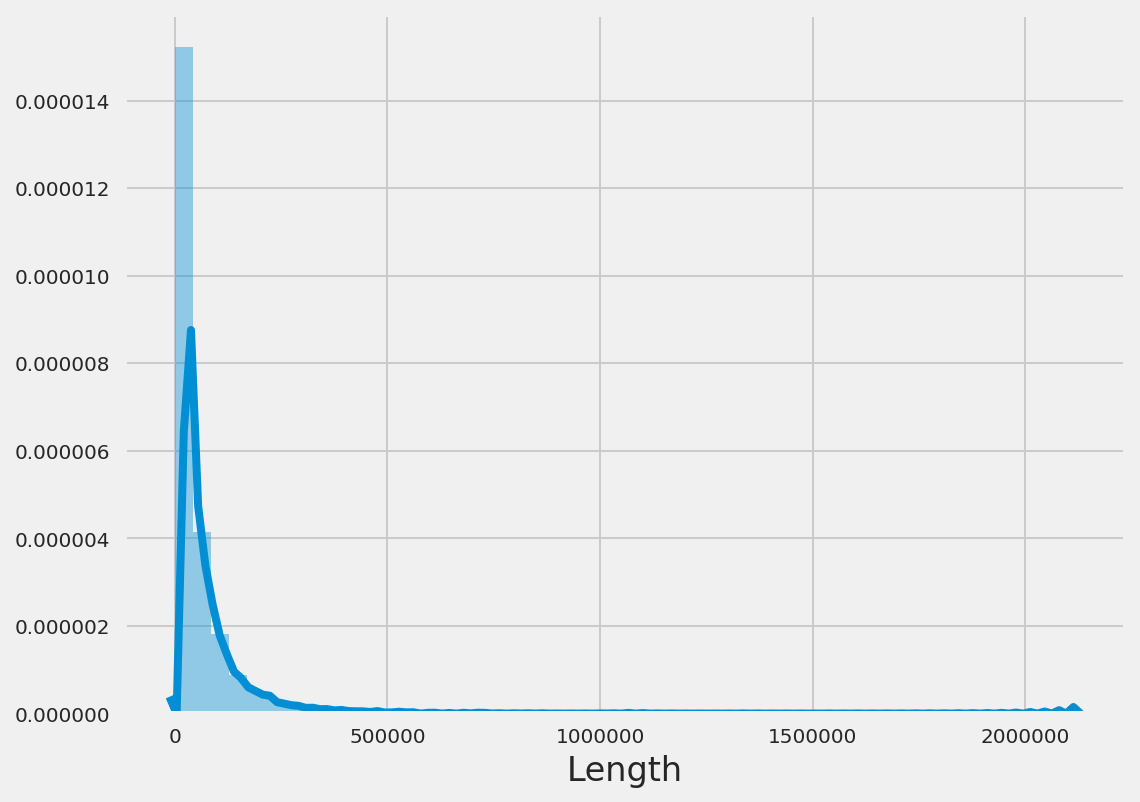

In [40]:
sns.distplot(tmp_mRNA_anno['Length'])

### Collapse onto start site

In [111]:
annotation_start_site = pd.DataFrame(columns=tmp_mRNA_anno.columns.values)
for group,start_site in tmp_mRNA_anno.groupby(['Start','Chr']):
    if len(start_site) == 1:
        annotation_start_site = annotation_start_site.append(start_site)
    else:
        #Pick the most confident txn and the longest transcript
        annotation_start_site = annotation_start_site.append(start_site.sort_values(['cs','Length'],ascending=[True,False]).iloc[0])
annotation_start_site.sort_values(['Chr','Start'],inplace=True)

annotation_start_site['Start'] = annotation_start_site['Start'].astype(int)
annotation_start_site['End'] = annotation_start_site['End'].astype(int)

In [148]:
annotation_start_site.head()

,Chr,Start,End,Strand,ID,Parent,gene_id,gene,transcript_id,cs,Length
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+,asmbl_2,gene_1_2,gene_1_2,SERHL,asmbl_2,2,38518
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-,asmbl_4,gene_2,gene_2,RRP7A,asmbl_4,1,38915
ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_7;cs=1,picr_0,7759,44597,-,asmbl_7,gene_2,gene_2,RRP7A,asmbl_7,1,36838
ID=asmbl_8;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_8;cs=1,picr_0,7767,44597,-,asmbl_8,gene_2,gene_2,RRP7A,asmbl_8,1,36830
ID=asmbl_9;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_9;cs=1,picr_0,7789,44568,-,asmbl_9,gene_2,gene_2,RRP7A,asmbl_9,1,36779


In [119]:
annotation_start_site.to_csv('/data/isshamie/genome/start_site_mRNA_updated_final_sort.tsv',sep='\t')

In [121]:
print annotation_start_site.shape
print tmp_mRNA_anno.shape

(52382, 11)
(66092, 11)


In [131]:
distances = []
for gr,curr in annotation_start_site.groupby(['Chr','Strand']):
    if len(curr) > 1:
        for i in range(1,curr.shape[0]):
            distances.append(curr.iloc[i]['Start']-curr.iloc[i-1]['Start'])
distances = np.array(distances)

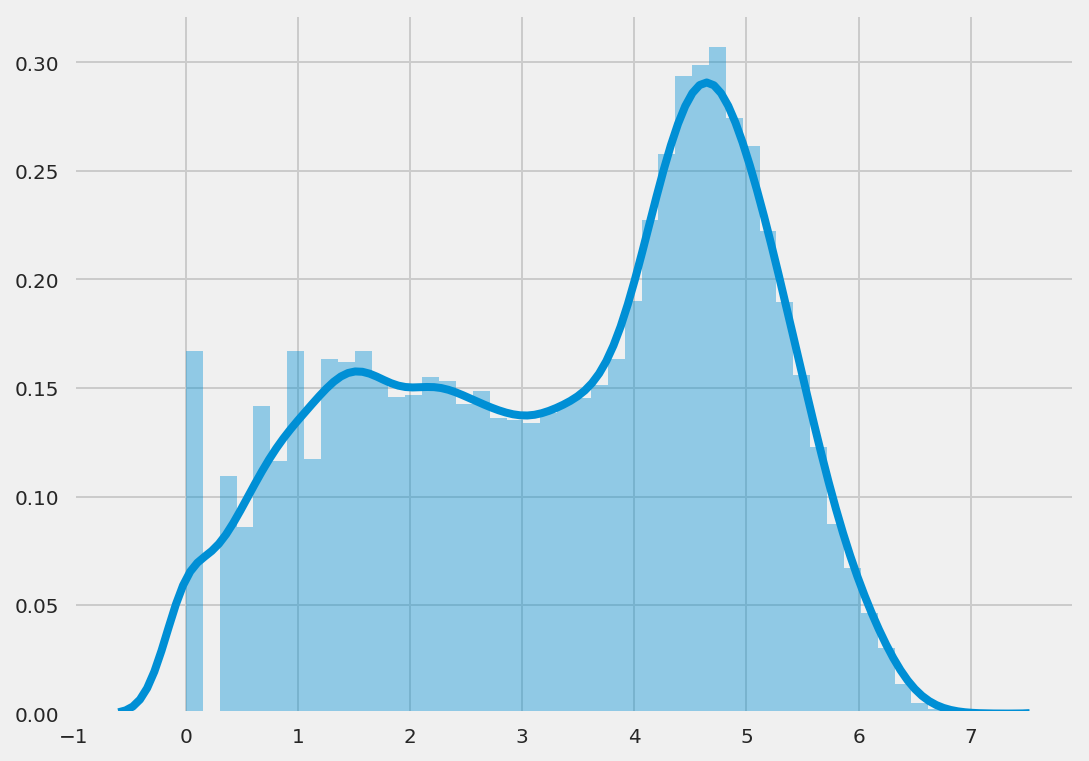

In [141]:
sns.distplot((np.log10(distances)))

In [147]:
print 'Numbe of start sites: ', len(distances)
print 'Start sites on same bp: ' , np.sum(distances == 0)
print 'Start sites less than 10 bp: ' , np.sum(distances < 10)
print 'Start sites less than 100 bp: ' , np.sum(distances < 100)
print 'Start sites less than 500 bp: ' , np.sum(distances < 500)
print 'Start sites less than 500 bp: ' , np.sum(distances < 1000)

Numbe of start sites:  51498
Start sites on same bp:  0
Start sites less than 10 bp:  5486
Start sites less than 100 bp:  13462
Start sites less than 500 bp:  18859
Start sites less than 500 bp:  20977


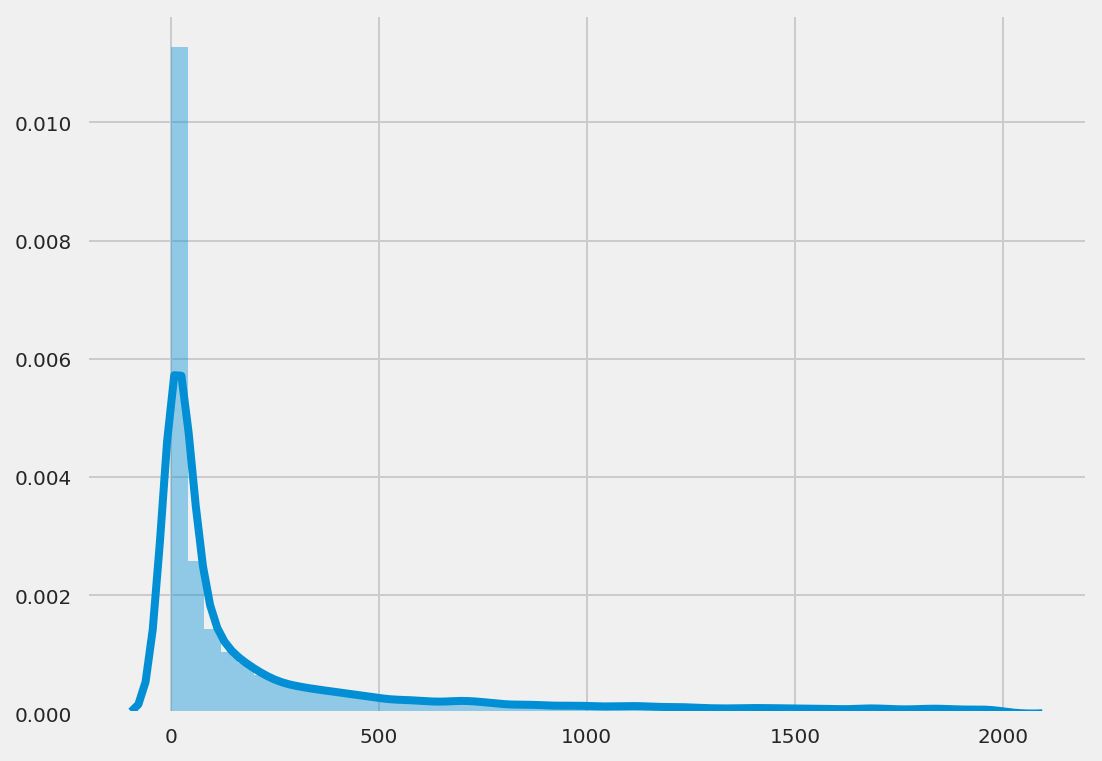

In [146]:
sns.distplot(distances[distances<2000],norm_hist=False)

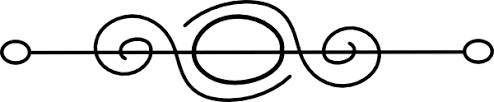

In [22]:
from IPython.display import Image
Image(filename='/home/isshamie/chapter_break.png',width=600)

## Comparing gene_id and genes

### Some genes during annotation using pasa had stretch of gene clustered near each other but there was no real overlap in the RNA-seq reads so were split up. So e.g gene=SERHL has both gene_id=1_2 and gene_id=1_4 b/c apparently their RNA-seq didnt overlap and seemed like they should actually be 2 different genes, so Shangzhong added the extra number 

In [4]:
annotation_start_site = pd.read_csv('/data/isshamie/genome/start_site_mRNA_updated_final_sort.tsv',sep='\t',index_col = 0)

In [5]:
annotation_start_site.head(10)

,Chr,Start,End,Strand,ID,Parent,gene_id,gene,transcript_id,cs,Length
ID=asmbl_2;Parent=gene_1_2;gene_id=gene_1_2;gene=SERHL;transcript_id=asmbl_2;cs=2,picr_0,176,38694,+,asmbl_2,gene_1_2,gene_1_2,SERHL,asmbl_2,2,38518
ID=asmbl_4;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_4;cs=1,picr_0,7715,46630,-,asmbl_4,gene_2,gene_2,RRP7A,asmbl_4,1,38915
ID=asmbl_7;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_7;cs=1,picr_0,7759,44597,-,asmbl_7,gene_2,gene_2,RRP7A,asmbl_7,1,36838
ID=asmbl_8;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_8;cs=1,picr_0,7767,44597,-,asmbl_8,gene_2,gene_2,RRP7A,asmbl_8,1,36830
ID=asmbl_9;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_9;cs=1,picr_0,7789,44568,-,asmbl_9,gene_2,gene_2,RRP7A,asmbl_9,1,36779
ID=asmbl_10;Parent=gene_2;gene_id=gene_2;gene=RRP7A;transcript_id=asmbl_10;cs=1,picr_0,7821,44513,-,asmbl_10,gene_2,gene_2,RRP7A,asmbl_10,1,36692
ID=asmbl_11;Parent=gene_1_4;gene_id=gene_1_4;gene=SERHL;transcript_id=asmbl_11;cs=2,picr_0,18149,43772,+,asmbl_11,gene_1_4,gene_1_4,SERHL,asmbl_11,2,25623
ID=asmbl_12;Parent=gene_1_4;gene_id=gene_1_4;gene=SERHL;transcript_id=asmbl_12;cs=2,picr_0,20787,42039,+,asmbl_12,gene_1_4,gene_1_4,SERHL,asmbl_12,2,21252
ID=asmbl_14;Parent=gene_1_4;gene_id=gene_1_4;gene=SERHL;transcript_id=asmbl_14;cs=2,picr_0,20942,38694,+,asmbl_14,gene_1_4,gene_1_4,SERHL,asmbl_14,2,17752
ID=asmbl_15;Parent=gene_1_4;gene_id=gene_1_4;gene=SERHL;transcript_id=asmbl_15;cs=4,picr_0,22504,23694,+,asmbl_15,gene_1_4,gene_1_4,SERHL,asmbl_15,4,1190


In [12]:
len(annotation_start_site['gene'].unique())

17246

In [6]:
mult_gene_ids = annotation_start_site[annotation_start_site['gene_id'].str.count('_') == 2]

In [7]:
print('Number of genes with multiple gene_ids near each other: ',len(mult_gene_ids['gene'].unique()))


('Number of genes with multiple gene_ids near each other: ', 4851)


### Number of genes with multiple gene_ids which are in different locations 
### *not counting gene_1_1 & gene_1_2 as two b/c those are the nearby clusters one, but counting the gene_1 and gene_102 b/c those are different locations altogether

In [10]:
gene_duplicates = pd.Series(index=annotation_start_site['gene'].unique())
for ind,val in annotation_start_site.groupby('gene'):
    
    
    if ind == 'RRP7A' or  ind == 'SERHL':
        print(ind)
        print(val['gene_id'].unique())
        print(set(map(lambda x: x.split('_')[1],val['gene_id'].unique())))
        print(len(set(map(lambda x: x.split('_')[1],val['gene_id'].unique()))))
    gene_duplicates.set_value(ind,len(set(map(lambda x: x.split('_')[1],val['gene_id'].unique()))))

RRP7A
['gene_2' 'gene_2002' 'gene_9222' 'gene_12565' 'gene_22223' 'gene_26629']
set(['12565', '26629', '22223', '2002', '2', '9222'])
6
SERHL
['gene_1_2' 'gene_1_4' 'gene_26628_1']
set(['1', '26628'])
2


In [11]:
print('Number of genes in more than 1 location:', np.sum(gene_duplicates>1))

('Number of genes in more than 1 location:', 2272)
